# Advanced NLP - Problems

**Author:** Ties de Kok ([Personal Website](https://www.tiesdekok.com))  <br>
**Last updated:** September 2021  
**Python version:** Python 3.6+     
**Recommended environment: `researchPython`**

In [1]:
import os
recommendedEnvironment = 'researchPython'
if os.environ['CONDA_DEFAULT_ENV'] != recommendedEnvironment:
    print('Warning: it does not appear you are using the {0} environment, did you run "conda activate {0}" before starting Jupyter?'.format(recommendedEnvironment))

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Introduction</span>
</div>

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Make sure to open up the respective tutorial notebook(s)! <br> That is what you are expected to use as primary reference material. </span>
</div>

### Relevant tutorial notebooks:

1) [`0_python_basics.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)  


2) [`2_handling_data.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb)  


3) [`NLP_Notebook.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/Python_NLP_Tutorial/blob/master/NLP_Notebook.ipynb)  

## Import required packages

In [3]:
import os, re
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [4]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
import scipy

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: center; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 1 </span>
</div>  

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 15px; font-weight:bold;'> Note: feel free to add as many cells as you'd like to answer these problems, you don't have to fit it all in one cell. </span>
</div>

## 1) Entity extraction using Spacy

```python
example_string = "John Smith is a Professor at the University of Washington. Which is located in Seattle."
```

## 1a) Visualize the entities in the example string

What you should get:

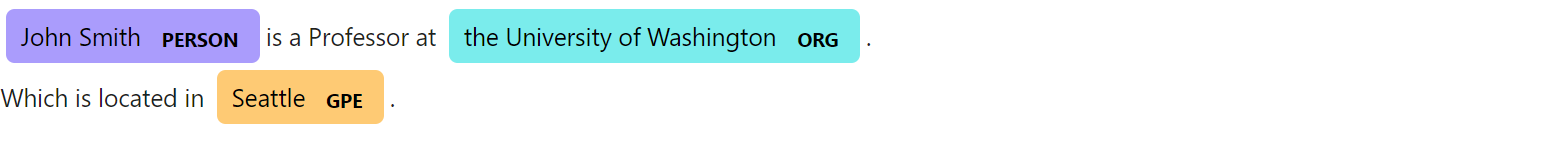  

**Hint:** check: https://spacy.io/usage/visualizers

## 1b) Create a Pandas dataframe containing the extracted entities

Your dataframe should look like this:

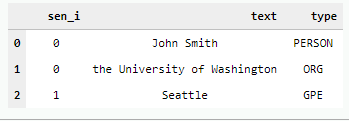

**Hint 1:** you can retrieve the entity type by applying `.label_` to the entity item  
**Hint 2:** you can use `enumerate()` when creating a loop to avoid having to use a counter (google it!)

## 2) For each sentence in `data > example_transcript.txt` find the sentence that is closest in semantic similarity  

Use the built-in `.similarity()` function that come with Spacy. 
The documentation is here: https://spacy.io/api/token#similarity

Limit your sample to sentences with more than 100 characters.

This is what you should (roughly) end up with in the end:

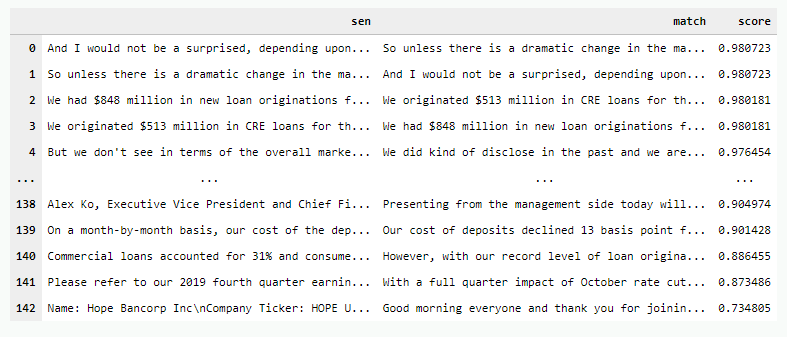

### 2a) load the `example_transcript.txt` file

### 2b) Split the file up into sentences and only keep sentences longer than 100 characters

### 2c) Retrieve matches based on closest semantic similarity  
**Hint:** Use the Spacy `.similarity()` function (https://spacy.io/usage/vectors-similarity).

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 2: Express text numerically</span>
</div>

## Load MD&A files

I have included a random selection of 20 pre-processed MDA filings in the `data > MDA_files` folder. The filename is the unique identifier.   

You will also find a file called `MDA_META_DF.xlsx` in the "data" folder, this contains the following meta-data for eaching MD&A: 
* filing date  
* cik   
* company name  
* link to filing

### Load data into a dictionary with as key the filename and as value the content of the text file

The files should all be in the following folder:  
```
Path.cwd() / 'data' / 'MDA_files'
```

It should look like this:

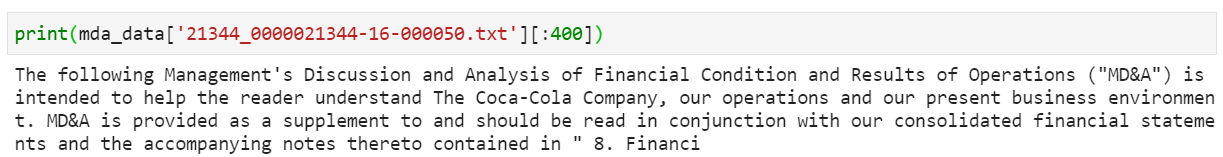

## 3) Bag of words approach

### 3a) Calculate the Term Frequency (TF) vectors for the MD&A files.  

You should end up with a matrix of 20 rows (because you have 20 MD&A files).

**Make sure to remove stop words.**

**Hint:** https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

### 3a - I) How many terms do you have in your TF matrix?

### 3a - II) Print the first 5 and last 5 terms in your TF matrix

### 3a - III) Create a Pandas DataFrame that contains the term, the term frequency, and MD&A identifiers.

**Tip:** you can convert the matrix to a dataframe using: `pd.DataFrame(tf.toarray())`

**Warning:** this can be quite memory intensive, feel free to skip this step if your computer runs out of memory!

This is what it should (roughly) look like:

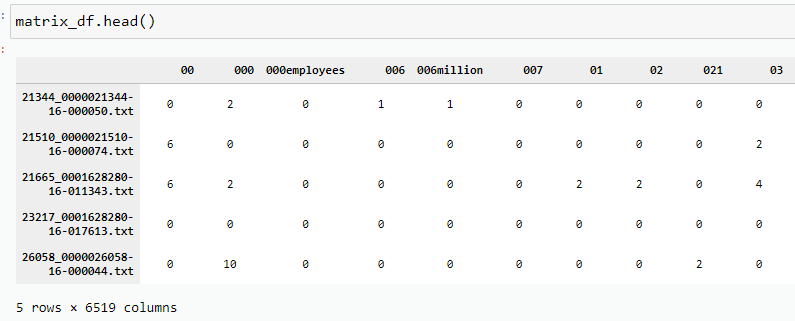

### 3a - IIII) What are the top 10 most frequent terms?  
**Hint:** Use the DataFrame you just created.

----
### 3b) Calculate the Term Frequency - Inverse Document Frequency (TFIDF) vectors   

You should end up with a matrix with 20 rows (because you have 20 MD&A files).

**Make sure to remove stop words.**

**Hint:** https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

### 3b - I) Create a Pandas DataFrame that contains the term, the TFIDF, and MD&A identifiers.

**Tip:** you can convert the matrix to a dataframe using: `pd.DataFrame(tf.toarray())`

**Warning:** this can be quite memory intensive, feel free to skip this step if your computer runs out of memory!


This is what it should look like:
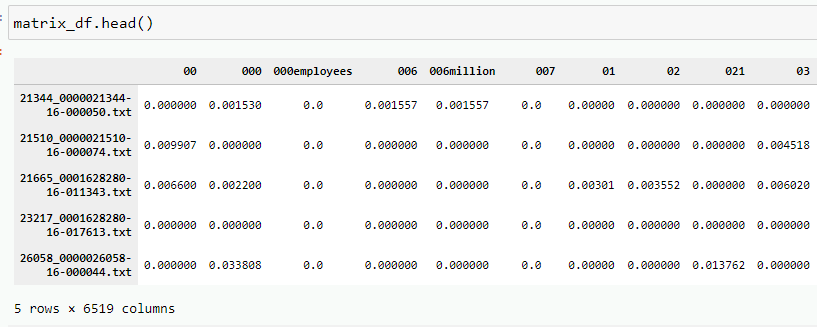

### 3b - II) What are the top 10 TFIDF terms?   

----
### 3c - I) Calculate the cosine similarity based on the tfidf vectors between each of the MD&A documents

**Hint 1:** https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html   

It should look something like this:  

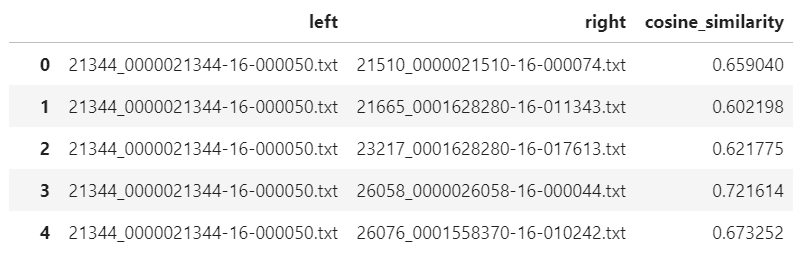

### 3c - II) For each MD&A find the MD&A with the closest cosine similarity  

For simplicity you don't have to concern yourself with replacement (but this would be a concern otherwise).

## 4) Word embeddings using Spacy

### 4a - I) Get the GloVe word vectors for each MD&A using Spacy

The `en_core_web_lg` model of Spacy comes with 300-dimensional GloVe vectors pre-included.

This is an important part of the documentation:

> By default, `Token.vector` returns the vector for its underlying Lexeme, while `Doc.vector` and `Span.vector` return an average of the vectors of their tokens. 

A word vector will provide a vector of 300 dimensions for each word, so in order to generate a vector at the sentence or document level it is nescessary to make an aggregation. 

Read more here: https://spacy.io/usage/vectors-similarity  

**Note: this might take several minutes depending on your machine. TQDM will be useful here to keep track of how long it takes.**

It should look something like this:

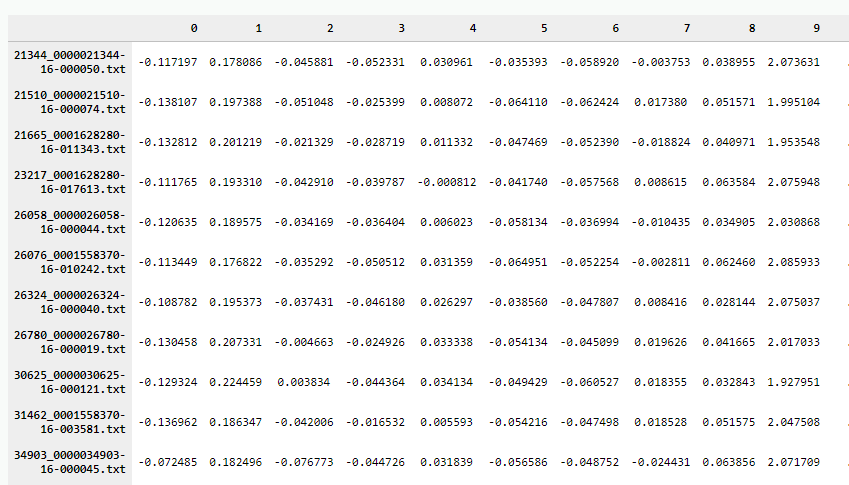

### 4a - II) Rerun your cosine similarity code from 3c - I / II with the GloVe vectors and compare the closest MD&As

Your dataframe should look something like this:

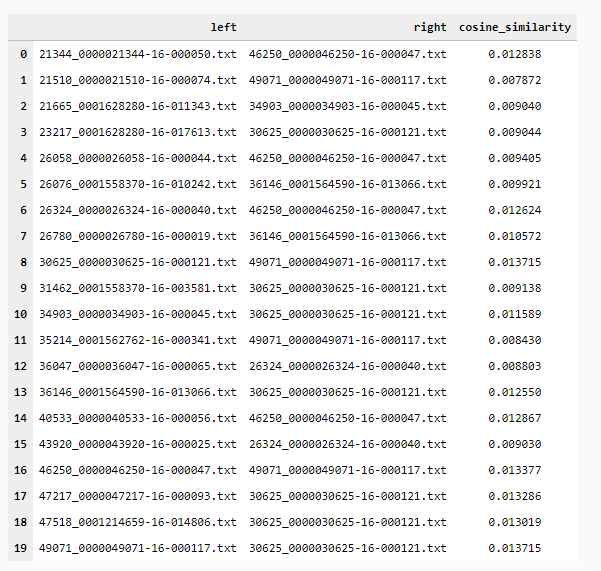